**Data Science**

**Spring 2025**

*Raya Namazi-Assignment 8*

*Link of the notebook* : https://colab.research.google.com/drive/1pqLAhj_bYyDDfwqiE_5rh7r4WkrSB8dQ#scrollTo=X1QroGwUGXDS

---

On this notebook we are going to use (multiclass)classification techniques on the "forest cover type" dataset, which is used for predicting the cover type for a given 30*30 meters cell based on various environmental features.

Theres are 7 distinct covertypes,which are labeled from 1 to 7:

1.Spruce/Fir

2.Lodgepole Pine

3.Ponderosa Pine

4.Cottonwood/Willow

5.Aspen

6.Douglas-fir

7.Krummholz



# Libraries
First we need to import libraries we will need later on.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype

Let's upgrade sikit-learn libraries.

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)


# Loading the Dataset
In the next step, we load the dataset.

In [ ]:
data = fetch_covtype()
features = data.data
target = data.target

Let's create dataframes for both features and targets, so we can work on them later.

In [ ]:
df_features = pd.DataFrame(features, columns=data.feature_names)
df_target = pd.DataFrame(target, columns=['type'])

# Getting some insights about the Dataset
Now, let's explore the dataset and visualize some distributions to get a better sense of it.

In [ ]:
df_features.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see soil type features is encoded using on-hot, which made the size of the dataset too large.

In [ ]:
df_target.head(10)

,type
0,5
1,5
2,2
3,2
4,5
5,2
6,5
7,5
8,5
9,5


Let's check the size of our dataset.

In [ ]:
df_features.shape

(581012, 54)

Let's pairplot some features and see how they correlate.

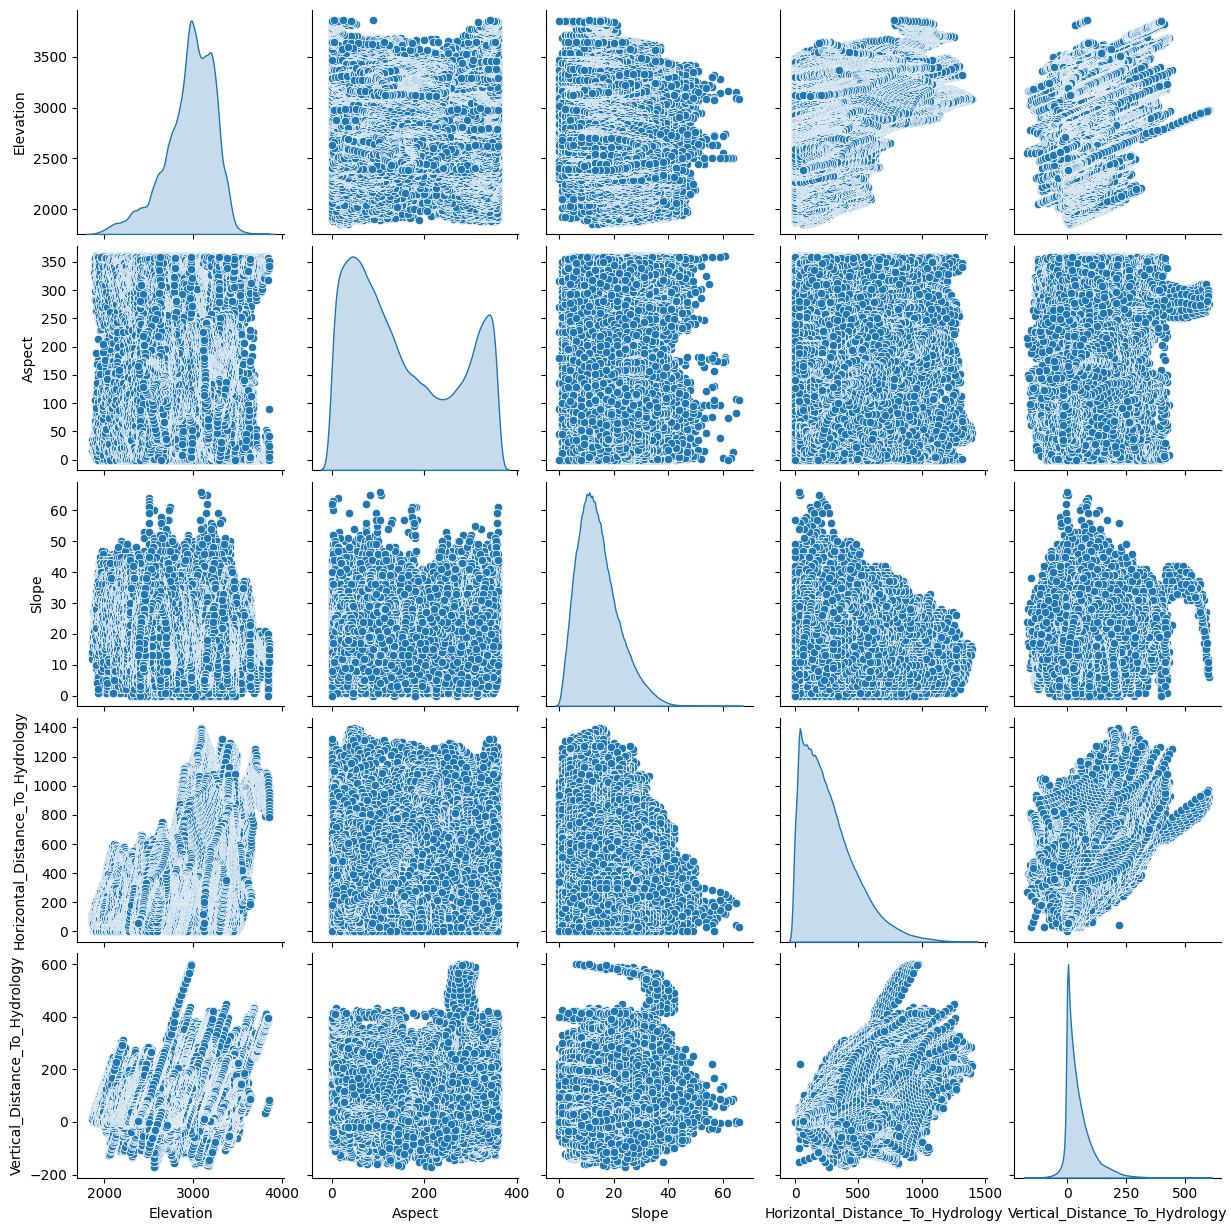

In [ ]:
cols_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
sns.pairplot(df_features[cols_to_plot], diag_kind='kde')

We can also check the distribution of target's classes

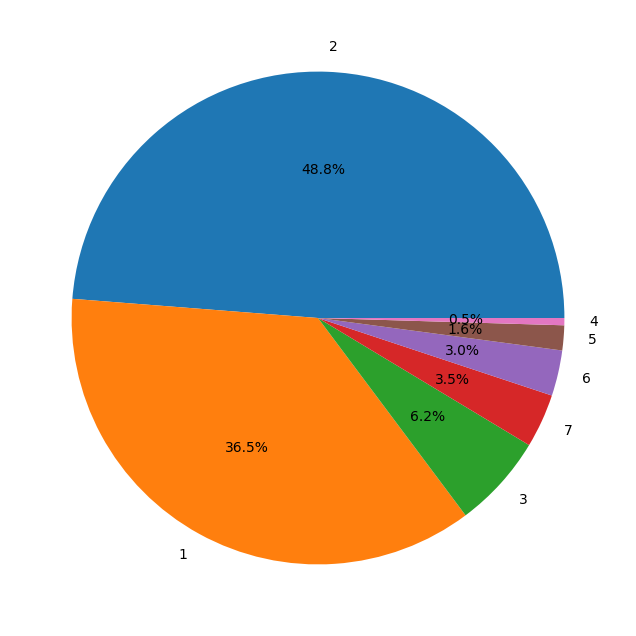

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_target['type'].value_counts(), labels=df_target['type'].value_counts().index, autopct='%1.1f%%')
plt.show()

As we can see the classes distribution is imbalanced, so we may need to do some overampling as well later on, which can improve our prediction specially in logistic regression and KNN which are sensitive to imbalanced classes.

Let's check our features columns.

In [ ]:
df_features.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

As we can see, the soil type feature is on-hot encoded into 40 columns, but we keep it in this way for now, since the classification algorithms we will use  here are compatible with this encoding.

# Data Cleaning
Now, it's time to check the dataset for missing values and clean it.(if necessary)

In [ ]:
df_features.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
df_target.isnull().sum()

,0
type,0


Fortunately, there is no missing value.

Let's check for duplicated rows.

In [ ]:
df_features.duplicated().sum()

np.int64(0)

# Feature Engineering
Now let's do some feature engineering to capture hidden features or create new features based on hidden realationships between them.

Based on some searching, I found out that the position of the cells relative to a water source is important in classifiying the cover type.
So we can create a binary feature simply for determinig if the cell is below the nearest water source or not.

We use the vertical_distance_to_hydrology feature for this task.

In [ ]:
is_below_water = (df_features['Vertical_Distance_To_Hydrology'] < 0).astype(int)
df_features['is_below_water'] = is_below_water

In [ ]:
df_features[['is_below_water']].head(8)

,is_below_water
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0


Another useful feature that can improve our training process, is averaging the hillshades. The original dataset has three features, measuring the hillshade at 9 AM, noon(12 PM), and 3 PM.

Diffferent forest cover types have different requirements for sunlight.For example some speicies, prefer sunnier spots and some grow in shaded areas.


In [ ]:
avg_hillshade = (df_features['Hillshade_9am'] + df_features['Hillshade_Noon'] + df_features['Hillshade_3pm']) / 3
df_features['avg_hillshade'] = avg_hillshade

In [ ]:
df_features[['avg_hillshade']].head(15)

,avg_hillshade
0,200.333333
1,202.000000
2,202.333333
3,199.333333
4,201.333333
5,202.333333
6,195.000000
7,198.666667
8,192.333333
9,190.333333


# Preparing Train and Test Sets
Now it's time to split our dataset into training and test sets, holding back 20% to see how well our model really performs.
We split before we normalizing because we want the train and test sets to stay completely independent. If we normalized everything first, we’d end up using test‐set values to compute the mean and standard deviation, artificially boosting our accuracy on the test set and hurting real-world generalization. So it’s best practice to normalize only after the split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(464809, 56)
(116203, 56)


# Normalization/Standardization
Now that we have splitted our dataset, it's time to normalize numerical features.


First, we need to exclude encoded features.

In [ ]:
df_features.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

I noticed that other than soil type feature, wilderness area is also encoded with one-hot encoding.

In [ ]:
df_features[['Wilderness_Area_0','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3']]

,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
581007,0.0,0.0,1.0,0.0
581008,0.0,0.0,1.0,0.0
581009,0.0,0.0,1.0,0.0
581010,0.0,0.0,1.0,0.0


As we can see our encoded features are soil type, wilderness area, is_below_water and average hillshade.

Let's transform them to numerical vlaues.

In [ ]:
encoded_cols = []
for col in df_features.columns:
  if col.startswith('Wilderness_Area') or col.startswith('Soil_Type'):
    encoded_cols.append(col)
encoded_cols.append('is_below_water')
encoded_cols.append('avg_hillshade')

In [ ]:
print(encoded_cols)

['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'is_below_water', 'avg_hillshade']


finally, we use sklearn standard scaler to normalize all other features so they would be in the same range.

Let's normalize the train set.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standard_scaling_columns = list(set(X_train.columns) - set(encoded_cols))
X_train[standard_scaling_columns] = scaler.fit_transform(X_train[standard_scaling_columns])


In [ ]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,is_below_water,avg_hillshade
count,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,4.648090e+05,...,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,1.542129e-16,3.014551e-17,7.481344e-17,-1.680016e-17,-1.800781e-17,3.898126e-18,-4.815026e-16,3.535638e-16,3.002933e-16,7.447713e-17,...,0.078079,0.002752,0.003223,0.000209,0.000525,0.026871,0.023836,0.014939,0.094951,192.664387
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.268297,0.052384,0.056678,0.014445,0.022906,0.161707,0.152537,0.121311,0.293147,14.468961
min,-3.928243e+00,-1.390576e+00,-1.884002e+00,-1.267873e+00,-3.642205e+00,-1.507528e+00,-7.923353e+00,-1.129448e+01,-3.724563e+00,-1.496510e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.666667
25%,-5.373428e-01,-8.723242e-01,-6.818560e-01,-7.594330e-01,-6.760474e-01,-7.982784e-01,-5.280273e-01,-5.218695e-01,-6.150408e-01,-7.230310e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,185.666667
50%,1.308325e-01,-2.557835e-01,-1.475687e-01,-2.415770e-01,-2.817028e-01,-2.262616e-01,2.189753e-01,1.356135e-01,1.208970e-02,-2.041050e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.333333
75%,7.311183e-01,9.326209e-01,5.202904e-01,5.399147e-01,3.869686e-01,6.279159e-01,7.045270e-01,6.919452e-01,6.653507e-01,4.296345e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203.000000
max,3.210870e+00,1.826158e+00,6.931737e+00,5.308897e+00,9.474041e+00,3.056422e+00,1.563580e+00,1.551731e+00,2.912568e+00,3.921622e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,213.666667


Now we do this for the test set as well.

In [ ]:
standard_scaling_columns = list(set(X_test.columns) - set(encoded_cols))
X_test[standard_scaling_columns] = scaler.fit_transform(X_test[standard_scaling_columns])

In [ ]:
X_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,is_below_water,avg_hillshade
222990,-1.745382,1.429388,-0.013578,0.035488,0.317340,-1.228788,-1.121995,0.185799,1.105457,-0.419583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,198.000000
435234,0.138260,-1.365734,0.653803,0.232852,-0.196077,-0.053679,-0.823754,-1.227007,0.010997,0.167512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,177.333333
353956,0.810224,1.670501,-0.147054,3.141626,1.087467,-0.574736,-0.749194,-0.217860,0.584285,0.384367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,192.000000
105301,-0.083345,-0.874579,-0.547483,-0.105487,-0.401445,1.590445,0.592887,-0.268318,-0.510175,0.591400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,189.666667
378289,0.327697,-1.088901,-0.013578,4.377502,3.534757,0.393492,0.182806,-0.671976,-0.458058,-0.696129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,184.000000


Note that we don't need to normalize our target, since it was encoded in the original dataset.

# Classification

Now it's time to use different classification algorithms on our dataset.
On this dataset we have 7 classes for our target variable.
The goal is to reach above 2.5/(number of classes), which is 0.35.

## SVM
I use linearsvc since the dataset's size is large so it is computationaly more efficient and set the maximum iteration to 1000 meaning that the solver would iterate 1000 times at most to get the optimal result.
I think the max iteration is small for this dataset with this size but it may take more training time.
Aslo if i oversmapled the dataset before training, we could get better accuracy.
But for now let's work with this simple adjustments.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
svm_model = LinearSVC(random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print(f"SVM F1-score: {f1_svm:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM F1-score: 0.4561


## Logistic Regression

### One Vs Rest
In One vs Rest strategy, we convert the original problem to multiple binary classification problems.
So that for each class we predict whether that instance belongs to that class or not, then after computing the probabilty for each class,that instance is assigned to the class with the highest probability.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
logreg_ovr = LogisticRegression(multi_class='ovr', solver='saga', random_state=42, max_iter=500)
logreg_ovr.fit(X_train, y_train)
y_pred_logreg_ovr = logreg_ovr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Now it's time to see how accurate our model is predicting.

In [ ]:
f1_logreg_ovr = f1_score(y_test, y_pred_logreg_ovr, average='macro')
y_pred_proba_ovr = logreg_ovr.predict_proba(X_test)
logloss_ovr = log_loss(y_test, y_pred_proba_ovr)
print(f"Logistic Regression OvR F1-score: {f1_logreg_ovr:.4f}")
print(f"Logistic Regression OvR Log Loss: {logloss_ovr:.4f}")

Logistic Regression OvR F1-score: 0.4618
Logistic Regression OvR Log Loss: 0.6636


### Multinomial
In multinomial approach, instead of training k models, it trains a model with k separate parameters and for each class it computes the score as:
\begin{equation}
s_i(x) = w_i \cdot x + b_i
\end{equation}
where w_i is the weight vector and b_i is the bias for class i.

 and their probabilities are computed as :
 \begin{equation}
P(y = i | x) = \frac{e^{s_i(x)}}{\sum_{j=1}^k e^{s_j(x)}}
\end{equation}
and then the class with highest probability is assigned to that instance.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
logreg_multi = LogisticRegression(multi_class='multinomial', solver='saga', random_state=42, max_iter=1000)
logreg_multi.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42,
                   solver='saga')

Let's test our model on the test set.

In [ ]:
y_pred_logreg_multi = logreg_multi.predict(X_test)

Now let's checl the model's accuracy.

In [ ]:
f1_logreg_multi = f1_score(y_test, y_pred_logreg_multi, average='macro')
y_pred_proba_multi = logreg_multi.predict_proba(X_test)
logloss_multi = log_loss(y_test, y_pred_proba_multi)
print(f"Logistic Regression Multinomial F1-score: {f1_logreg_multi:.4f}")
print(f"Logistic Regression Multinomial Log Loss: {logloss_multi:.4f}")

Logistic Regression Multinomial F1-score: 0.5271
Logistic Regression Multinomial Log Loss: 0.6313


## KNN

In a multiclass problem with KNN algorithm, it computes the distances and finds the k nearest neighbours, then it assgins the label that appears most frequently in those neighbours.
Here, i tested different parameters for k from 1 to 5, to find the best one which leads to a better f1 score.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
k_range = range(1, 5)
f1_scores_knn = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_knn, average='macro')
    f1_scores_knn.append(f1)
best_k = k_range[np.argmax(f1_scores_knn)]
best_f1_knn = max(f1_scores_knn)
print(f"Best K for KNN: {best_k} with F1-score: {best_f1_knn:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best K for KNN: 1 with F1-score: 0.7837


I also tested it for 5 to 15 before but since the result was K=5 for best estimator, I concluded that I should also test it for 1 to 5 to get better results.

## Decision Tree
Unlike logistic regression, decision trees don't need OvR or other algorithms to convert the probelm into binary probelms.
Also we need to be catious about the risk of overfitting by increasing the maximum depth parameter.
Here I use a common maximum depth which is 10.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print(f"Decision Tree F1-score: {f1_dt:.4f}")

Decision Tree F1-score: 0.6623


## Boosting
In Boosting algorithms we go through decision trees iteratively, where each tree is trained to correct previous trees errors.

### LightGBM

The learning rate controls each tree's contribiution in the final prediction.

The max depth parameter, is like the max depth paramter for decision trees.It limits the maximum depth of each decision tree and it can cause overfitting if we make it larger.

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
f1_lgb = f1_score(y_test, y_pred_lgb, average='macro')
print(f"LightGBM F1-score: {f1_lgb:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2297
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 55
[LightGBM] [Info] Start training from score -1.009263
[LightGBM] [Info] Start training from score -0.718158
[LightGBM] [Info] Start training from score -2.786752
[LightGBM] [Info] Start training from score -5.358182
[LightGBM] [Info] Start training from score -4.111507
[LightGBM] [Info] Start training from score -3.511538
[LightGBM] [Info] Start training from score -3.343918
LightGBM F1-score: 0.8166


### CatBoost
First we need to install catbooost.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.1 MB/s eta 0:00:00


The iteration parameter is the number of trees per class. so we have 700 trees for this model.

The learning rate parameter limits the update made by each tree for correcting previous tree.

The depth parameter limits the maximum depth of each tree.

We set the verbose to false so our output would be clean by not printing log infos.

In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100,
                          learning_rate=.3,
                          depth=5,
                          verbose=False,
                          )
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
f1_cat = f1_score(y_test, y_pred_cat, average='macro')
print(f"CatBoost F1-score: {f1_cat:.4f}")

CatBoost F1-score: 0.6948


### XGBoost

First we decrease classes by one so they would be zero based, since the algorithm requires the classes to start with zero.

The n_estimator parameter is the number of trees per each class.
I set it to 50 so the training time would be reduced.

In [ ]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1
xgb_model = XGBClassifier(n_estimators=50)
xgb_model.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb = y_pred_xgb + 1
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

In [ ]:
print(f"XGBoost F1-score: {f1_xgb:.4f}")

XGBoost F1-score: 0.8441


### XGBoost with Grid Search
We use Grid Search to tune hyperparameters for XGBoost.

For reducing the run time we try few values for each parameter.
we set the values in paramgrid dictionary and set the cv to 3 which means that the training set is split into 3 folds, training on 2 folds and validating on the third for each fold.
We have 12 total combinations for hyperparameters and 3 models per each, leading to 36 models to train!
Also we set the n_jobs parameter to -1 so models can be trained in parallel.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 5, 7]
}
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_xgb)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters for XGBoost: {best_params}")
print(f"Best Cross-Validation F1-score: {best_score:.4f}")
xgb_best = grid_search.best_estimator_
xgb_best.fit(X_train, y_train_xgb)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation F1-score: 0.9058


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_best.predict(X_test)
y_pred_xgb = y_pred_xgb + 1
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print(f"XGBoost F1-score on test set: {f1_xgb:.4f}")

XGBoost F1-score on test set: 0.9041


# Question

**Explain how KNN and decision trees can be extended to multi-label classification problems.**

## KNN


In multilabel classification, each K nearest neighbour can have a set of labels and the prediction for a test instance, is based on the most frequent labels among its K nearest neighbours.

 The algorithm follows this approach:

 1. Identify the K-nearest neighbours of a test instance based on a distance metric (e.g Euclidean).

 1. For each label, count how many of the K nearest neighbours have that label.

 2. Assign that label to the test instance, if it appears in at least a constant number of times based on a threshold.

## Decision Trees

It can be done in two ways:

1. We can extend decision trees to separate trees for each label and convert the problem to multiple binary classification problems at once, so for each label, a separate decision tree is trained to predict whether that label is present in that test instance or not, then in the end, we take a union of all present labels.Although this approach is simple, but it ignores the correlation between labels, so here's where the second approach can be useful.

2. We modify the tree to allow each leaf to predict a set of labels. The tree is built by considering label combinations. This captures label dependencies but is computationally expensive